## REGRESION LOGISTICA

In [1]:

import numpy as np
import pandas as pd
import sidetable

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Buscar un conjunto de datos a analizar

In [2]:
df = pd.read_csv("../ficheros/Churn_Modelling.csv", index_col= 0).reset_index(drop= True)
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

- **CustomerId:** Código Cliente
- **Surname:** Apellido
- **CreditScore:** Predicción de si vas a ser capaz de pagar o no
- **Geography:** País
- **Gender:** género
- **Age:** Edad
- **Tenure:** Tenencia del préstamo (plazos del préstamo)
- **Balance:** Importe pendiente de pagar
- **Num Of Products:** Nº de productos
- **HasCrCard:** Tiene o no tarjeta de crédito
- **Is Active Member:** es o no miembro activo
- **Estimated Salary:** Salario estimado
- **Exited:** Dejarían el banco o no. *Variable respuesta*

Realizamos un EDA sencillo

In [3]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.shape

(10000, 13)

In [5]:
# Comprobamos el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.stb.missing() # No tenemos nulos

,missing,total,percent
CustomerId,0,10000,0.0
Surname,0,10000,0.0
CreditScore,0,10000,0.0
Geography,0,10000,0.0
Gender,0,10000,0.0
Age,0,10000,0.0
Tenure,0,10000,0.0
Balance,0,10000,0.0
NumOfProducts,0,10000,0.0
HasCrCard,0,10000,0.0


In [7]:
# Comprobamos si tenemos duplicados
df.duplicated().sum() # No tenemos duplicados

0

In [8]:
# Comprobamos los estadísticos de las numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [9]:
df.describe(include= "object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [10]:
df["Surname"].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [11]:
# Eliminamos las columnas Surname y CustomerId porque no nos interesan para hacer la regresión logística
df.drop(["Surname", "CustomerId"], axis=1, inplace= True)
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


Analizamos visualmente la variable respuesta

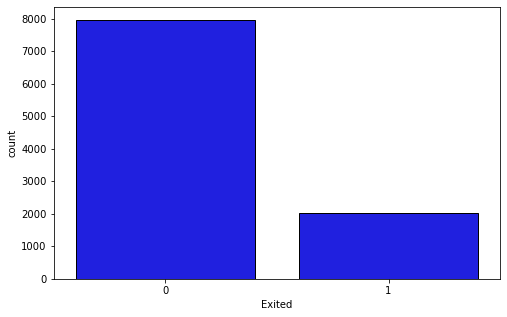

In [12]:
plt.figure(figsize=(8,5))

fig = sns.countplot(data = df, x = "Exited",  color = "blue",  edgecolor='black')
fig.set(xticklabels=["0", "1"]) 
plt.show();

In [13]:
# Vemos el porcentaje
df["Exited"].value_counts()/df.shape[0] # Vemos que un 79% es que no, tenemos una variable respuesta muy desbalanceada

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Hacemos las gráficas de distribución para las variables categóricas comparadas con la columna respuesta

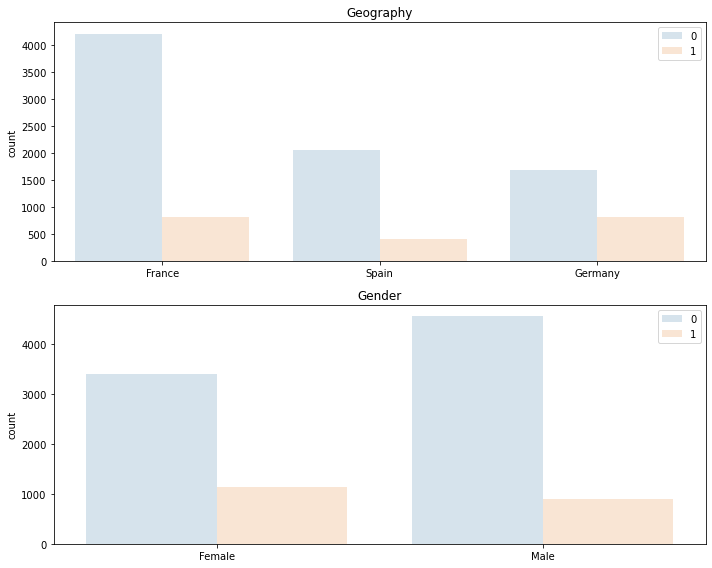

In [14]:
fig, axes = plt.subplots(2, 1, figsize = (10, 8))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Exited",
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(colum)
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

Vemos que en general a la mayoría de la gente no se va. Aunque la proporción respecto al pais es mayor para los alemanes y españoles que para los franceses

Ahora hacemos las gráficas para ver la distribución de las variables continuas

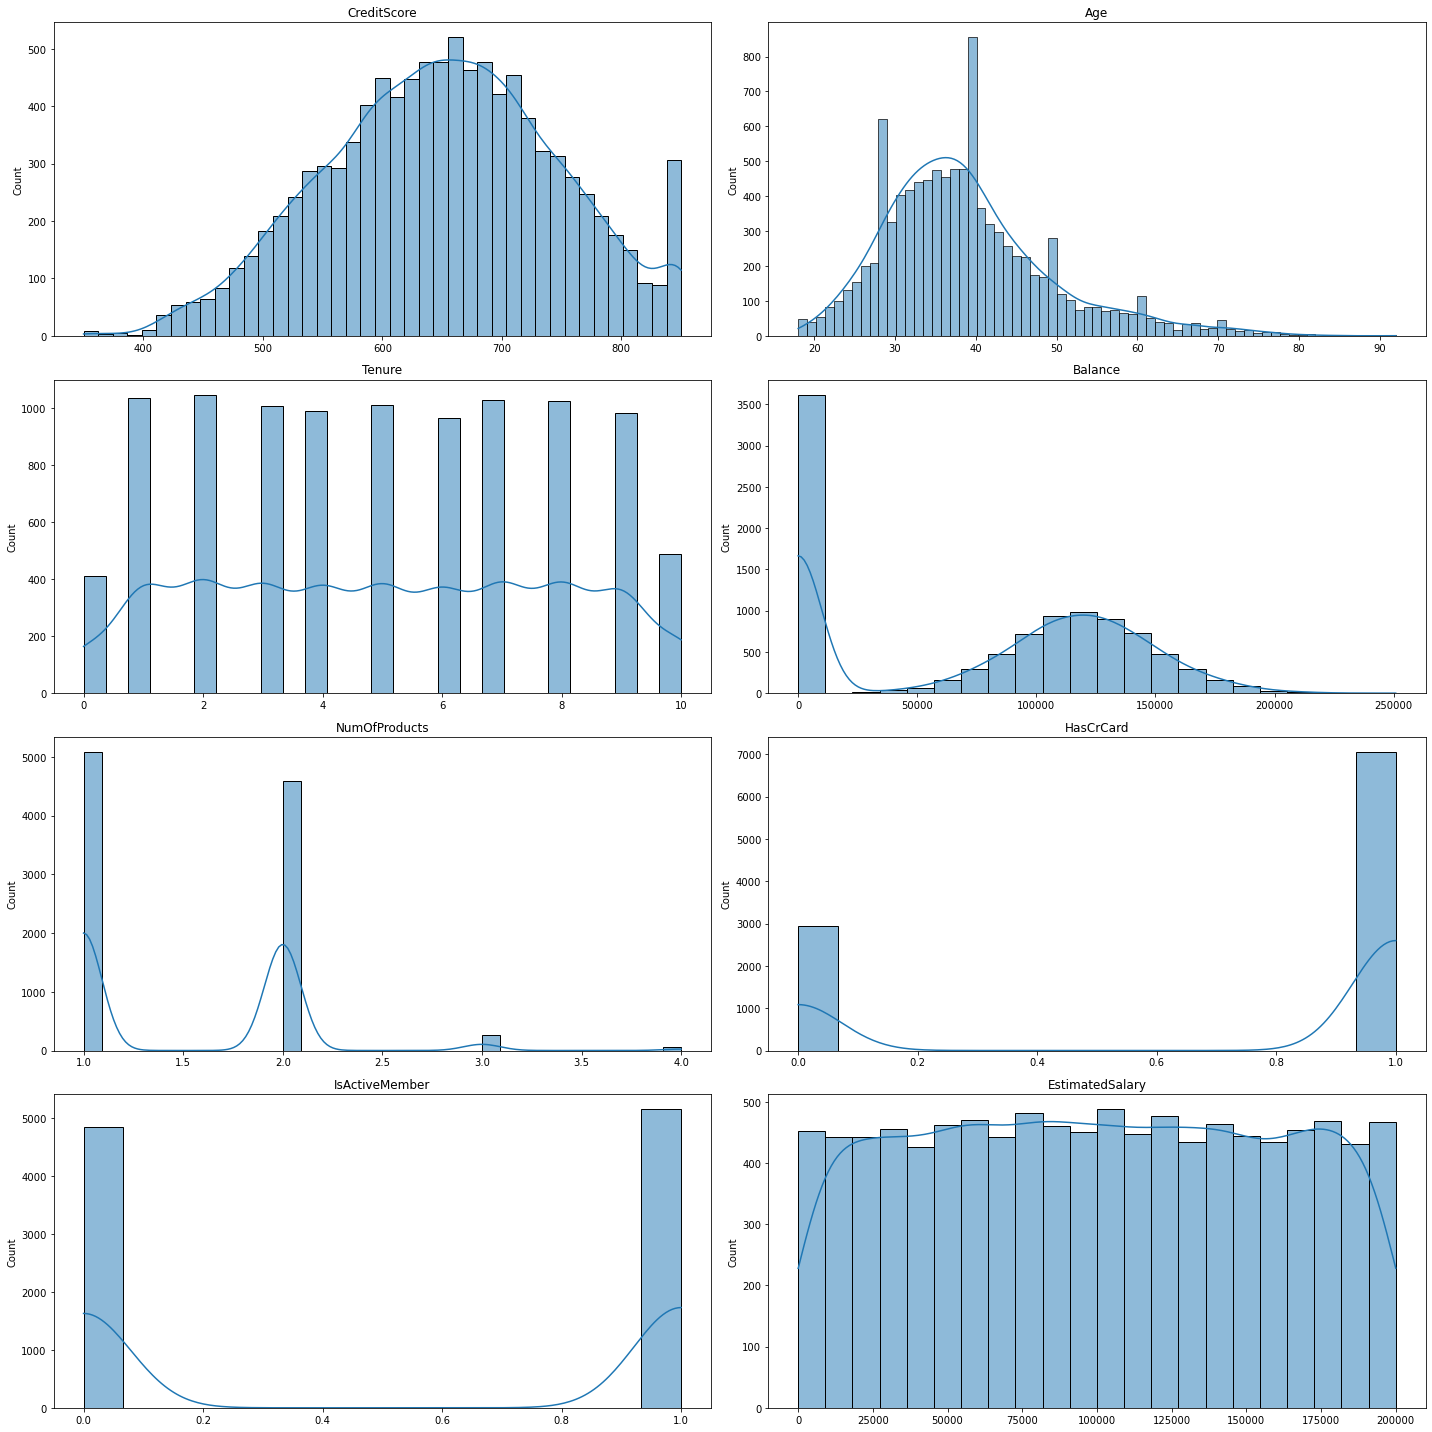

In [15]:

fig, axes = plt.subplots(4,2, figsize = (20, 20))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Exited")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        ax = axes[i])

    axes[i].set_title(colum)
    axes[i].set_xlabel("")
    
fig.tight_layout();

In [16]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [17]:
df[["NumOfProducts", "HasCrCard", "IsActiveMember"]] = df[["NumOfProducts", "HasCrCard", "IsActiveMember"]].astype("category")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.9+ KB


In [19]:
# Seleccionamos las columnas numericas
num = df.select_dtypes(np.number)
num.head(2)

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
0,619,42,2,0.00,101348.88,1
1,608,41,1,83807.86,112542.58,0


In [20]:
num.corr()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797,0.118533
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,0.012097,1.000000


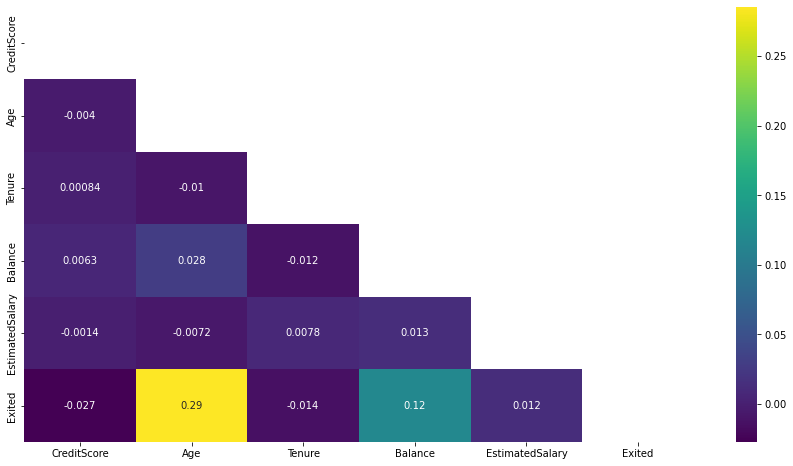

In [21]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(num.corr(), dtype=bool))
sns.heatmap(num.corr(), cmap="viridis", annot = True, mask = mask); 

Vamos a comprobar los outliers

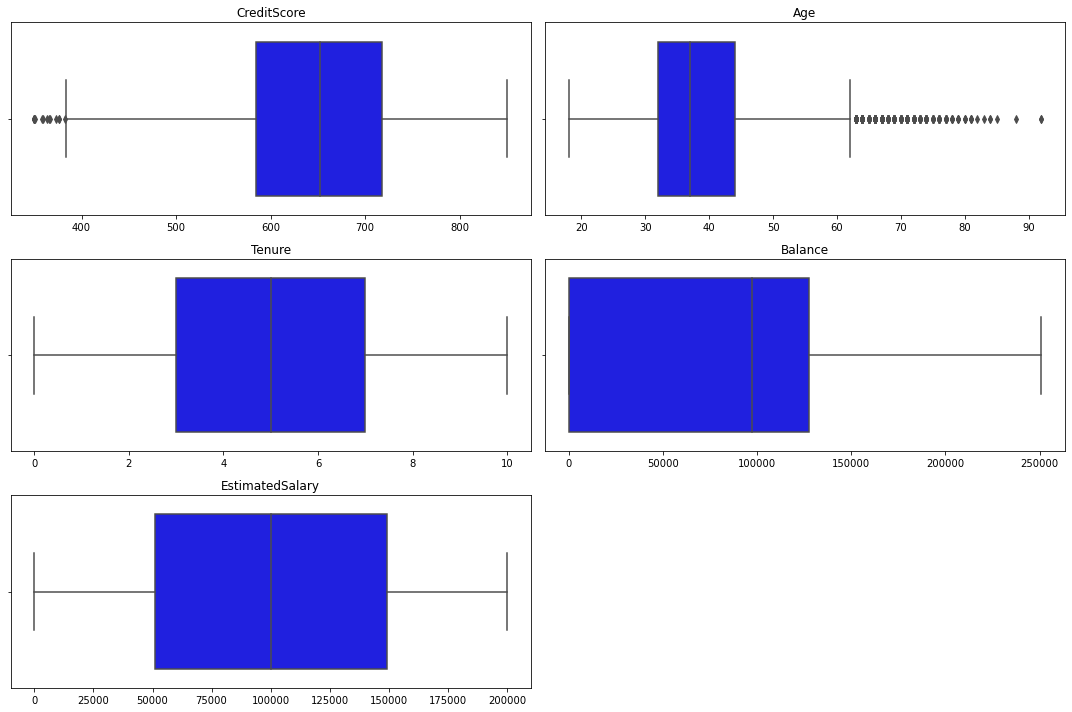

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(15,10))

categorias = num.drop("Exited", axis = 1).columns

axes = axes.flat

for indice, col in enumerate(categorias):

    sns.boxplot(x = num[col], data = df, ax=axes[indice], color = "blue"); # para trazar una línea de densidad

    axes[indice].set_title(col)
    axes[indice].set_xlabel("")

fig.delaxes(axes[-1])
fig.tight_layout();

In [24]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [25]:
lista = num.drop("Exited", axis=1).columns
lista

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], dtype='object')

In [26]:
indices = detectar_outliers(lista, df)
print(indices)

{'CreditScore': [7, 942, 1193, 1405, 1631, 1838, 1962, 2473, 2579, 8154, 8723, 8762, 9210, 9356, 9624], 'Age': [58, 85, 104, 158, 181, 230, 234, 243, 252, 310, 364, 371, 385, 399, 559, 567, 602, 612, 658, 678, 736, 766, 769, 807, 811, 823, 859, 884, 888, 948, 952, 957, 963, 969, 1009, 1039, 1040, 1055, 1205, 1234, 1235, 1246, 1252, 1278, 1285, 1342, 1387, 1407, 1410, 1439, 1457, 1519, 1543, 1607, 1614, 1790, 1810, 1866, 1901, 1904, 1907, 1933, 1981, 2002, 2012, 2039, 2053, 2078, 2094, 2108, 2154, 2159, 2164, 2244, 2274, 2433, 2458, 2459, 2553, 2615, 2670, 2713, 2717, 2760, 2772, 2778, 2791, 2855, 2877, 2901, 2908, 2925, 2926, 3033, 3054, 3110, 3142, 3192, 3203, 3229, 3311, 3314, 3317, 3346, 3366, 3368, 3378, 3382, 3384, 3387, 3396, 3434, 3497, 3499, 3527, 3531, 3541, 3559, 3573, 3575, 3602, 3646, 3647, 3651, 3690, 3691, 3702, 3728, 3733, 3761, 3813, 3826, 3880, 3881, 3888, 3909, 3910, 3927, 3940, 3980, 3994, 4010, 4025, 4048, 4051, 4142, 4147, 4162, 4170, 4241, 4244, 4256, 4273, 4297, 

In [27]:
# Los cambiamos por la mediana
for k, v in indices.items():
    mediana = df[k].median() 
    for i in v:
        df.loc[i,k] = mediana 

In [28]:
df.to_csv("../ficheros/01-Churn_Modelling.csv")